In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import gmaps
import gmaps.geojson_geometries
from config import gkey
import numpy as np
import requests
from pprint import pprint
import time
import json
import os
from scipy.stats import linregress, sem, ttest_ind, stats
import seaborn as sns
import plotly.graph_objects as go

In [12]:
#Load building permit data from https://www.census.gov/construction/bps/

build_permits = pd.read_csv("CensusBuildingPermitsCum2000_2018.csv")

build_permits.head()

,Year,Units,Value (000),Value (Billions),Cumulative
0,2000,35900,"4,207,090",4.21,4.21
1,2001,37569,"4,440,651",4.44,8.65
2,2002,47037,"5,146,453",5.15,13.79
3,2003,56571,"5,939,092",5.94,19.73
4,2004,56036,"6,499,425",6.50,26.23


In [13]:
#Load compaction data from USGS https://www.sciencebase.gov/catalog/item/5cd30a76e4b09b8c0b7a5cb3

avecompaction = pd.read_csv("Toalave_compbyyear.csv")

avecompaction

,Year,Total Ave
0,2000,-1.294777
1,2001,-1.304949
2,2002,-1.313009
3,2003,-1.319282
4,2004,-1.311744
5,2005,-1.311581
6,2006,-1.330068
7,2007,-1.318957
8,2008,-1.322852
9,2009,-1.347239


In [14]:
#Pull relevant data out of dataframes to plot
years = build_permits.iloc[:,0]
values = build_permits.iloc[:,4]
units = build_permits.iloc[:,1]
subsidence = avecompaction.iloc[:,1]

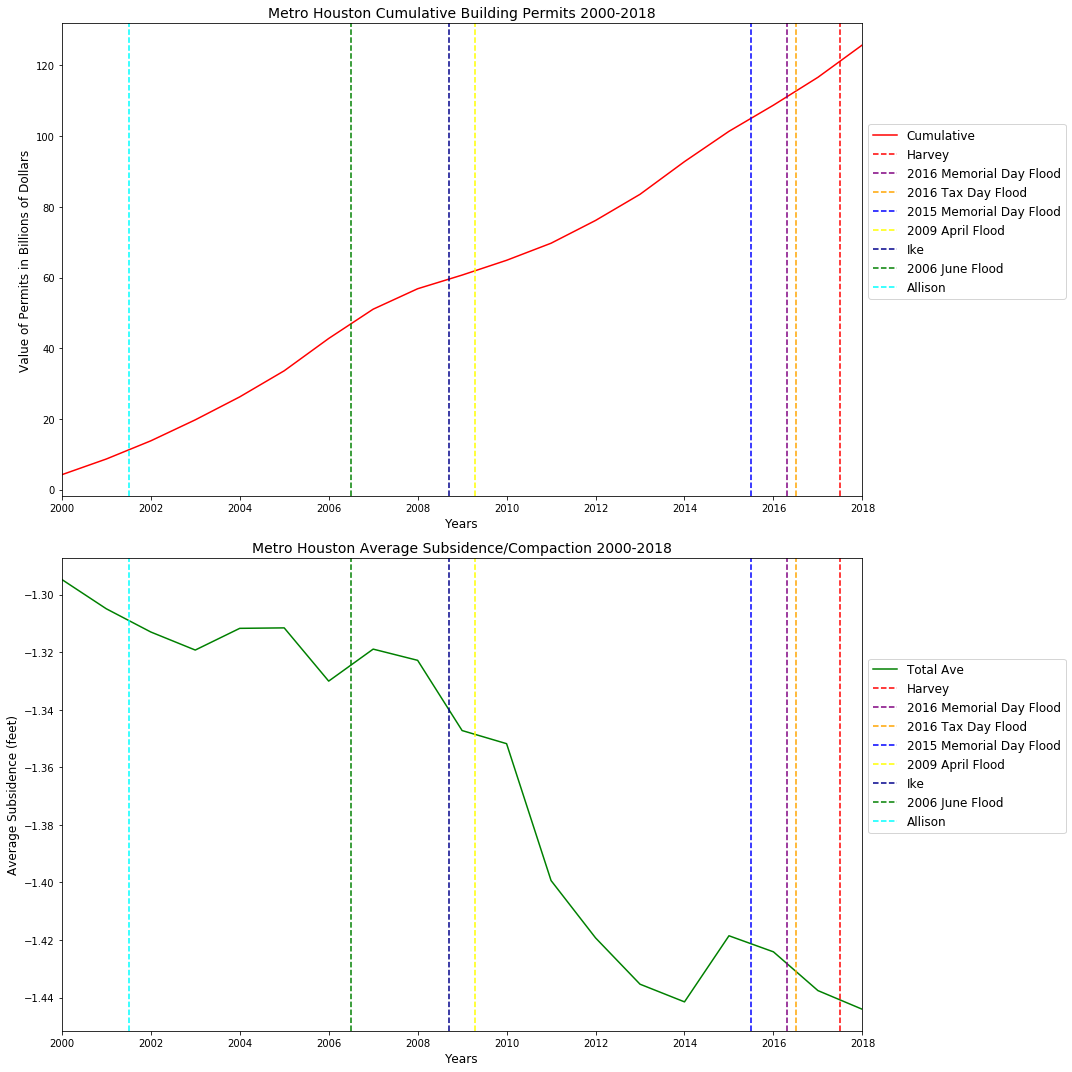

In [15]:
plt.figure(figsize=(15, 15))

#Plot building permit values by year from https://www.census.gov/construction/bps/ for the Metropolitan region of Houston 26420
# and significant flooding events per Harris County Flood Control District (HCFCD)https://www.hcfcd.org/media/2381/historytimeline-24x36-1.pdf

plt.subplot(2, 1, 1)
plt.plot(years, values, 'r')
plt.axvline(x=2017.5,linestyle='--', color='red',label='Harvey')
plt.axvline(x=2016.3,linestyle='--', color='purple',label='2016 Memorial Day Flood')
plt.axvline(x=2016.5,linestyle='--', color='orange',label='2016 Tax Day Flood')
plt.axvline(x=2015.5,linestyle='--', color='blue',label='2015 Memorial Day Flood')
plt.axvline(x=2009.3,linestyle='--', color='yellow',label='2009 April Flood')
plt.axvline(x=2008.7,linestyle='--', color='darkblue',label='Ike')
plt.axvline(x=2006.5,linestyle='--', color='green',label='2006 June Flood')
plt.axvline(x=2001.5,linestyle='--', color='cyan',label='Allison')

plt.legend(loc='best', fontsize=12, bbox_to_anchor=(1, .8))
plt.title('Metro Houston Cumulative Building Permits 2000-2018',fontsize=14)
plt.xlabel("Years",fontsize=12)
plt.ylabel("Value of Permits in Billions of Dollars",fontsize=12)
plt.xlim(2000, 2018)

#Plot compaction/subsidence by year obtained form USGS https://www.sciencebase.gov/catalog/item/5cd30a76e4b09b8c0b7a5cb3
#and significant flooding events per Harris County Flood Control District (HCFCD) https://www.hcfcd.org/media/2381/historytimeline-24x36-1.pdf
plt.subplot(2, 1, 2)
plt.plot(years, subsidence, 'g')
plt.axvline(x=2017.5,linestyle='--', color='red',label='Harvey')
plt.axvline(x=2016.3,linestyle='--', color='purple',label='2016 Memorial Day Flood')
plt.axvline(x=2016.5,linestyle='--', color='orange',label='2016 Tax Day Flood')
plt.axvline(x=2015.5,linestyle='--', color='blue',label='2015 Memorial Day Flood')
plt.axvline(x=2009.3,linestyle='--', color='yellow',label='2009 April Flood')
plt.axvline(x=2008.7,linestyle='--', color='darkblue',label='Ike')
plt.axvline(x=2006.5,linestyle='--', color='green',label='2006 June Flood')
plt.axvline(x=2001.5,linestyle='--', color='cyan',label='Allison')
plt.legend(loc='best', fontsize=12, bbox_to_anchor=(1, .8))

plt.title('Metro Houston Average Subsidence/Compaction 2000-2018',fontsize=14)
plt.ylabel('Average Subsidence (feet)',fontsize=12)
plt.xlabel("Years",fontsize=12)
plt.xlim(2000, 2018)
plt.tight_layout()
plt.savefig("../permitsvscompaction.png")
plt.show()

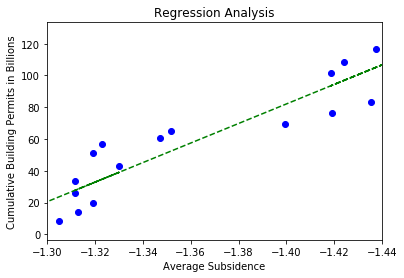

Ttest_indResult(statistic=-7.232248930854358, pvalue=9.996153518531865e-07)

In [23]:
#Perform regression analysis of the cumulative building permits and subsidence
fig, ax = plt.subplots()

(slope, intercept, _, _, _) = linregress(subsidence, values)
fit = slope * subsidence + intercept
ax.plot(subsidence, fit,'g--')
ax.scatter(subsidence, values, color = 'blue')
ax.set_xlabel('Average Subsidence')
ax.set_ylabel('Cumulative Building Permits in Billions')

plt.xlim(-1.3,-1.44)

plt.title('Regression Analysis')
plt.show()

stats.ttest_ind(subsidence, values, equal_var=False)

In [19]:
#Import USGS compacition data (original file of added measurements by the year)
fileone=("USGS_compaction_data.csv")
soil_data=pd.read_csv(fileone,encoding='utf-8')
soil_data.head()

,Year,Addicks,Texas City,Southwest,Seabrook,Pasadena,Northeast,Lake Houston,Johnson Space City,East End,Clear Lake Shallow,Clearlake deep,Baytown Shallow,Baytown Deep
0,2000,3.127917,0.094615,1.529692,1.532769,0.302462,0.863308,0.551308,2.338077,1.312846,0.675615,0.685538,0.537154,0.962000
1,2001,3.202769,0.096846,1.530385,1.511154,0.329000,0.868077,0.552538,2.339692,1.314077,0.682846,0.693308,0.534077,0.988692
2,2002,3.295077,0.094000,1.528538,1.509462,0.314923,0.868385,0.557231,2.336231,1.313231,0.680385,0.691308,0.522154,0.959308
3,2003,3.374923,0.092154,1.532154,1.500692,0.296462,0.867462,0.563077,2.335077,1.311538,0.676154,0.680231,0.517154,0.938769
4,2004,3.400154,0.094538,1.506692,1.491846,0.267615,0.847462,0.555231,2.336000,1.306154,0.675923,0.682231,0.502769,0.919615


In [24]:
#Average compaction by area/region: 
addicks=soil_data["Addicks"].mean()
texas_city=soil_data["Texas City"].mean()
southwest=soil_data["Southwest"].mean()
seabrook=soil_data["Seabrook"].mean()
pasadena=soil_data["Pasadena"].mean()
northeast=soil_data["Northeast"].mean()
lakehouston=soil_data['Lake Houston'].mean()
spacecity=soil_data['Johnson Space City'].mean()
eado=soil_data['East End'].mean()
Countymeans=[addicks, texas_city,southwest, seabrook, pasadena, northeast, lakehouston, spacecity, eado]
Counties=["Addicks", "Texas City", 'Southwest', 'Seabrook', 'Pasadena', 'Northeast', 'Lake Houston', 'Johnson Space City','EADO']
Zipcode=[77494,77590,77044,77586,77502,77073,77532,77058,77002]
Lat=[29.740677,29.391397,29.906616, 29.583816, 29.679518, 29.999166,29.932872, 29.561579,29.756845]
Lng=[ -95.829652,-94.920149,-95.180608,-95.036166,-95.199783, -95.400119,-95.057187,-95.099626, -95.365652 ]
Soil_means=pd.DataFrame({"County":Counties, "Zipcodes":Zipcode,"Lat":Lat, "Lng":Lng,"Average Compaction(ft)":Countymeans})
Soil_means

,County,Zipcodes,Lat,Lng,Average Compaction(ft)
0,Addicks,77494,29.740677,-95.829652,3.506481
1,Texas City,77590,29.391397,-94.920149,0.096358
2,Southwest,77044,29.906616,-95.180608,1.590291
3,Seabrook,77586,29.583816,-95.036166,1.527237
4,Pasadena,77502,29.679518,-95.199783,0.378327
5,Northeast,77073,29.999166,-95.400119,0.878826
6,Lake Houston,77532,29.932872,-95.057187,0.581543
7,Johnson Space City,77058,29.561579,-95.099626,2.406221
8,EADO,77002,29.756845,-95.365652,1.324833


In [21]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

In [25]:
# Create a poverty Heatmap layer
locations=Soil_means[['Lat','Lng']].astype('float')

#locations=(77494,77590,77044,77586,77502,77073,77532,77058,77002)
c=Soil_means['Average Compaction(ft)'].astype('float')
compaction=c

fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=compaction, 
                                 dissipating=False, max_intensity=-100,
                                 point_radius = .11, gradient=[(90, 150, 210,0.9),
                                                              (0,0,255,0.8),
                                                              (0,0,0,1)])

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))